# Demonstration of the implemented histogram based watermarking schemes for audio signals
The following notebook illustrates the implemented histogram-based watermarking schemes. All of them mark the amplitude histogram of an audio signal.


In [1]:
# Import some general dependencies
%matplotlib inline
import soundfile as sf
import numpy as np
import os.path
import matplotlib.pyplot as plt

## Xiang's method
This is a demonstration of using Xiang's method

In [2]:
# Import the module, which implements the proposed method
%cd ../
from core.audio_cwe.xiang_wm_scheme import XiangWMSystem 
from core.audio_cwe import watermarking_utils

INPUT_DIR = './../res/testing/original_test_files/SQAM/'
OUTPUT_DIR = './../res/demo/notebooks/schemes'
FILENAME = '46.wav'

/Users/gru/Documents/skripte/CSM/scripts/ws_15_16/38777 Masterthesis/src/audio_cwe_framework


### Embedding procedure

In [3]:
# Load soundfile
samples, samplerate = sf.read(os.path.join(INPUT_DIR, FILENAME), dtype=np.int16)

# Form the watermark
w = watermarking_utils.construct_watermark(['HdM', 'Stg'])
key = 2.0
# Construct the Xiangs watermarking system
wm_system_xiang = XiangWMSystem(la=key, num_bins=3*len(w[0]), threshold=1.3, delta=0.05)

# Mark the samples 
marked_samples = wm_system_xiang.embed_watermark(samples, w, key=key)

# Write result to disk
sf.write(os.path.join(OUTPUT_DIR, FILENAME[:-4]+'_marked_xiang.wav'), marked_samples, samplerate)
iv = wm_system_xiang.get_params() # returns the parameters as dictionary
watermarking_utils.dump_params(OUTPUT_DIR, FILENAME[:-4]+'_marked_xiang', iv=iv, mark=w)

Embedding  [[0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 0 1]
 [0 1 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 1 1 0 0 1 1 1]]  via Xiang's method
---------------------------------------------
in channel # 0
---------------------------------------------
in channel # 1
---------------------------------------------


### Visualize result

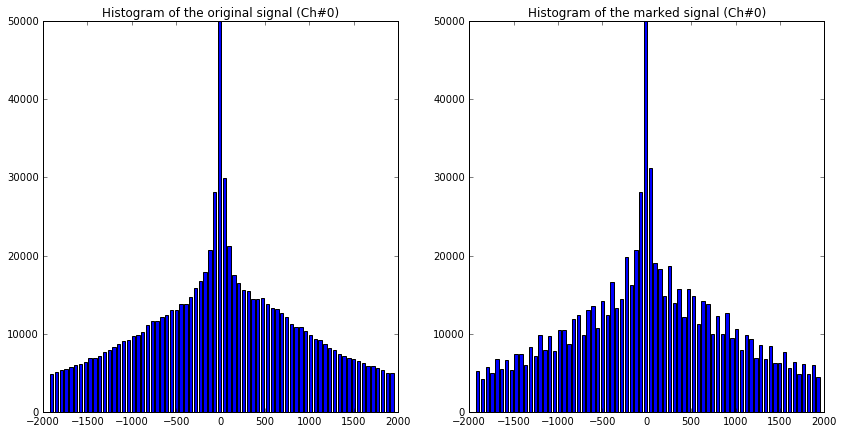

In [4]:
# Plot the histograms of the original and the marked signal
hist0, bins0 = XiangWMSystem.generate_histogram(samples[:, 0], wm_system_xiang.la, wm_system_xiang.num_bins, 
                                                XiangWMSystem.mean_of_absolute_values(samples[:,0]))
width0 = 0.7 * (bins0[1] - bins0[0])
center0 = (bins0[:-1] + bins0[1:]) / 2

hist1, bins1 = XiangWMSystem.generate_histogram(marked_samples[:, 0], wm_system_xiang.la, wm_system_xiang.num_bins, 
                                                XiangWMSystem.mean_of_absolute_values(marked_samples[:, 0]))
width1 = 0.7 * (bins1[1] - bins1[0])
center1 = (bins1[:-1] + bins1[1:]) / 2

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))
ax = axes.flat
ax[0].bar(center0, hist0, align='center', width=width0)
ax[0].set_title("Histogram of the original signal (Ch#0)")
ax[0].set_ylim(0,50000)
ax[1].bar(center1, hist1, align='center', width=width1)
ax[1].set_title("Histogram of the marked signal (Ch#0)")
ax[1].set_ylim(0,50000)

plt.show()

### Extraction procedure

In [5]:
# Load marked soundfile
samples, samplerate = sf.read(os.path.join(OUTPUT_DIR, FILENAME[:-4]+'_marked_xiang.wav'), dtype=np.int16)

# Construct the detector
wm_system_xiang = XiangWMSystem.from_file(os.path.join(OUTPUT_DIR, FILENAME[:-4]+'_marked_xiang_iv'))
mark_to_extract = np.loadtxt(os.path.join(OUTPUT_DIR, FILENAME[:-4]+'_marked_xiang_mark'), dtype=np.int)
syn = mark_to_extract[:,:8]

# Extract watermark
w_2 = wm_system_xiang.extract_watermark(samples, syn=syn, length=len(mark_to_extract[0]))

watermarking_utils.compare_watermarks(w, w_2)

Detecting watermark
---------------------------------------------
in channel # 0
---------------------------------------------
---------------------------------------------
Syn:  [0 1 0 0 1 0 0 0]
Best match:  [0, 1, 0, 0, 1, 0, 0, 0]
---------------------------------------------
in channel # 1
---------------------------------------------
---------------------------------------------
Syn:  [0 1 0 1 0 0 1 1]
Best match:  [0, 1, 0, 1, 0, 0, 1, 1]
---------------------------------------------
Original mark:
 [[0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 0 1]
 [0 1 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 1 1 0 0 1 1 1]]
Recovered mark:
 [[0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 0 1]
 [0 1 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 1 1 0 0 1 1 1]]
Original and recovered mark match perfectly.
BER:  0.0


## Schmitz' method 
Rudimentarily adapted for the use with 16-bit audio signals.

### Embedding procedure

In [6]:
from core.audio_cwe.schmitz_wm_scheme import SchmitzWMSystem 

# Form the watermark
w = watermarking_utils.construct_watermark(['HdM', 'Stg'])
# Load soundfile
samples, samplerate = sf.read(os.path.join(INPUT_DIR, FILENAME), dtype=np.int16)

# Construct Schmitz' watermarking system
wm_sys_schmitz = SchmitzWMSystem(step=9)
seed = [1234, 5678] # for each channel one seed

# Mark the samples 
marked_samples, bin_pairs = wm_sys_schmitz.embed_watermark(samples, w, key=seed)

# Write result to disk
sf.write(os.path.join(OUTPUT_DIR, FILENAME[:-4]+'_marked_schmitz.wav'), marked_samples, samplerate)
watermarking_utils.dump_params(OUTPUT_DIR, FILENAME[:-4]+'_schmitz', mark=w, key=seed)

Embedding  [[0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 0 1]
 [0 1 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 1 1 0 0 1 1 1]]  via Schmitz' method
---------------------------------------------
in channel # 0
---------------------------------------------
in channel # 1
---------------------------------------------


### Visualization of the resulting histogram

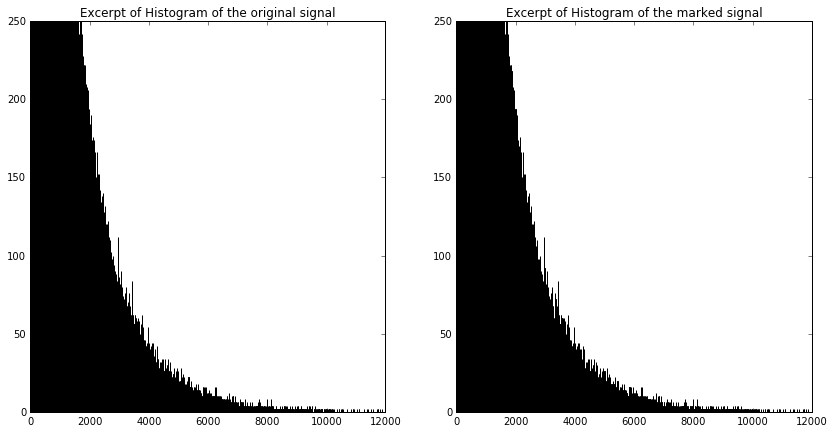

In [7]:
# Plot the histograms of the original and the marked signal
hist0, bins0 = wm_sys_schmitz.generate_standard_histogram(samples)
width0 = 0.7 * (bins0[1] - bins0[0])
center0 = (bins0[:-1] + bins0[1:]) / 2

hist1, bins1 = wm_sys_schmitz.generate_standard_histogram(marked_samples)
width1 = 0.7 * (bins1[1] - bins1[0])
center1 = (bins1[:-1] + bins1[1:]) / 2

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))
ax = axes.flat
ax[0].bar(center0, hist0, align='center', width=width0)
ax[0].set_title("Excerpt of Histogram of the original signal")
ax[0].set_xlim(0, np.amax(samples))
ax[0].set_ylim(0, 250)

ax[1].bar(center1, hist1, align='center', width=width1)
ax[1].set_title("Excerpt of Histogram of the marked signal")
ax[1].set_xlim(0, np.amax(samples))
ax[1].set_ylim(0, 250)

plt.show()

### Extraction procedure

In [8]:
# Load marked soundfile
samples, samplerate = sf.read(os.path.join(OUTPUT_DIR, FILENAME[:-4]+'_marked_schmitz.wav'), dtype=np.int16)

# Load the mark
mark = np.loadtxt(os.path.join(OUTPUT_DIR,  FILENAME[:-4]+'_schmitz_mark'))

# Load the data from the stored keyfile
keyfile = os.path.join(OUTPUT_DIR,  FILENAME[:-4]+'_schmitz_key')
key = watermarking_utils.read_keyfile(keyfile)

# Construct the detector
wm_sys_schmitz = SchmitzWMSystem(step=9)
                  
# Extract watermark
w_2 = wm_sys_schmitz.extract_watermark(samples, key=key, length=len(mark[0]))

watermarking_utils.compare_watermarks(w, w_2)

Detecting watermark
---------------------------------------------
in channel # 0
---------------------------------------------
in channel # 1
---------------------------------------------
Original mark:
 [[0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 0 1]
 [0 1 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 1 1 0 0 1 1 1]]
Recovered mark:
 [[0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 0 1]
 [0 1 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 1 1 0 0 1 1 1]]
Original and recovered mark match perfectly.
BER:  0.0


## The combined method
### Embedding procedure

In [9]:
from core.audio_cwe.xs_wm_scheme import XsWMSystem 

# Form the watermark
w = watermarking_utils.construct_watermark(['HdM', 'Stg'])

# Load soundfile
samples, samplerate = sf.read(os.path.join(INPUT_DIR, FILENAME), dtype=np.int16)

# Construct the combined watermarking system
wm_sys_combi = XsWMSystem(la=2.0, threshold=25, delta=0.0, step=5, num_bins=3*len(w[0]))
seed = [1234, 5678]

marked_samples, bin_pairs = wm_sys_combi.embed_watermark(samples, w, key=seed)
iv = wm_sys_combi.get_params() # returns the params as dict

# Write result to disk
sf.write(os.path.join(OUTPUT_DIR, FILENAME[:-4]+'_marked_xs.wav'), marked_samples, samplerate)
watermarking_utils.dump_params(OUTPUT_DIR, FILENAME[:-4]+'_xs', iv=iv, mark=w, key=bin_pairs)

Embedding  [[0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 0 1]
 [0 1 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 1 1 0 0 1 1 1]]  via combined method
---------------------------------------------
964.996115412
in channel # 0
---------------------------------------------
886.3049308
in channel # 1
---------------------------------------------


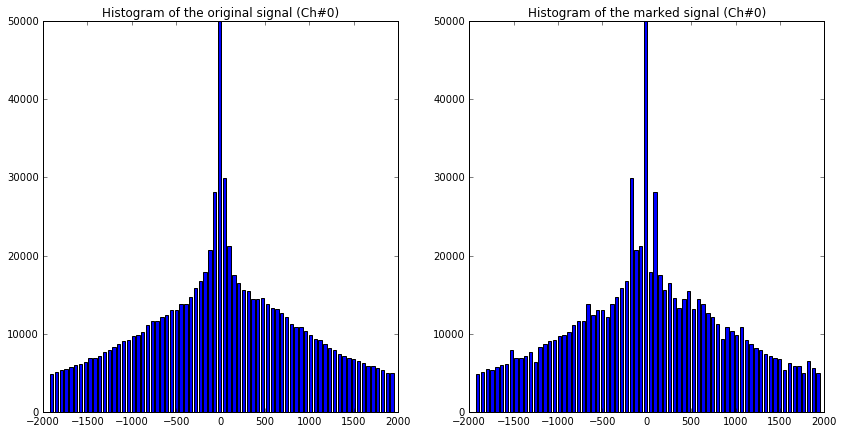

In [10]:
# Plot the histograms of the original and the marked signal
hist0, bins0 = XsWMSystem.generate_histogram(samples[:, 0], wm_sys_combi.la, wm_sys_combi.num_bins, 
                                                XsWMSystem.mean_of_absolute_values(samples[:,0]))
width0 = 0.7 * (bins0[1] - bins0[0])
center0 = (bins0[:-1] + bins0[1:]) / 2

hist1, bins1 = XsWMSystem.generate_histogram(marked_samples[:, 0], wm_sys_combi.la, wm_sys_combi.num_bins, 
                                                wm_sys_combi.orig_mean[0])
width1 = 0.7 * (bins1[1] - bins1[0])
center1 = (bins1[:-1] + bins1[1:]) / 2

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))
ax = axes.flat
ax[0].bar(center0, hist0, align='center', width=width0)
ax[0].set_title("Histogram of the original signal (Ch#0)")
ax[0].set_ylim(0,50000)
ax[1].bar(center1, hist1, align='center', width=width1)
ax[1].set_title("Histogram of the marked signal (Ch#0)")
ax[1].set_ylim(0,50000)

plt.show()

### Extraction procedure

In [11]:
# Load marked soundfile
samples, samplerate = sf.read(os.path.join(OUTPUT_DIR, FILENAME[:-4]+'_marked_xs.wav'), dtype=np.int16)

# Load the mark
mark = np.loadtxt(os.path.join(OUTPUT_DIR,  FILENAME[:-4]+'_xs_mark'))
syn = mark[:, :8]
# Load the data from the stored keyfile
keyfile = os.path.join(OUTPUT_DIR,  FILENAME[:-4]+'_xs_key_('+ str(len(mark))+', '+str(len(mark[0]))+ ', '+str(2)+')')
key = watermarking_utils.read_keyfile(keyfile)

# Construct the detector
wm_sys_combi = XsWMSystem.from_file(os.path.join(OUTPUT_DIR,  FILENAME[:-4]+'_xs_iv'))

w_2 = wm_sys_combi.extract_watermark(samples, key=key, syn=syn)

watermarking_utils.compare_watermarks(w, w_2)

Detecting watermark
---------------------------------------------
in channel # 0
---------------------------------------------
in channel # 1
---------------------------------------------
Original mark:
 [[0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 0 1]
 [0 1 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 1 1 0 0 1 1 1]]
Recovered mark:
 [[0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 0 1]
 [0 1 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 1 1 0 0 1 1 1]]
Original and recovered mark match perfectly.
BER:  0.0
